<a href="https://colab.research.google.com/github/JayabharathiRavi/Loan_status/blob/main/loan_status_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classification model:**

***a. Loan Status Prediction:***

i. This is a Property Loan Status Prediction dataset, we have the data of
applicants who had previously applied for the loan based on the property and
applicant-based metrics.

ii. The bank will decide whether to give a loan to the applicant based on some

factors such as Applicant Income, Loan Amount, previous Credit History, Co-
applicant Income, etc.

iii. The objective is to build a Machine Learning Model to predict the loan to be
approved or to be rejected for an applicant.
iv. You are free to use any classification.

    Here, i took Logistic Regression to build a model

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score


In [96]:
x_train=pd.read_csv("loan_train.csv")
x_test=pd.read_csv('loan_test.csv')

In [45]:
x_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
x_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [47]:
x_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
x_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [49]:
x_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# CHECKING IS THERE ANY NULL IN DATASETS

In [50]:
x_train.isnull().sum()
x_train.shape

(614, 13)

we will impute using mode for gender and married.

we will immpute using mean for Loanamount and loanamount term.

we drop nan from dependents,selfemployed and credit history

In [51]:
x_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

we will impute using mode for gender.

we will immpute using mean for Loanamount and loanamount term.

we drop nan from dependents,selfemployed and credit history

# Loan_ID

In [97]:
x_train=x_train.drop(['Loan_ID'],axis=1)
x_test=x_test.drop(['Loan_ID'],axis=1)

Here, We dropped the loand_id column in both x_train and x_test.

# Gender

In [53]:
x=x_train['Gender'].mode()
y=x_test['Gender'].mode()
x,y

(0    Male
 dtype: object, 0    Male
 dtype: object)

In [98]:
x_train['Gender']=x_train['Gender'].fillna('Male')
x=x_train['Gender'].unique()
x_test['Gender']=x_test['Gender'].fillna('Male')
y=x_test['Gender'].unique()
x,y

(array(['Male', 'Female'], dtype=object),
 array(['Male', 'Female'], dtype=object))

Here, We imputed gender column in both x_train and x_test.

# Married

In [55]:
x=x_train['Married'].mode()
x

0    Yes
dtype: object

In [99]:
x_train['Married']=x_train['Married'].fillna('Yes')
x_train['Married'].unique()

array(['No', 'Yes'], dtype=object)

Here, We imputed married column in x_train.

# LoanAmount

In [101]:
x=x_train['LoanAmount'].mean()
y=x_test['LoanAmount'].mean()
x,y

(146.41216216216216, 136.13259668508286)

In [102]:
x_train['LoanAmount']=x_train['LoanAmount'].fillna(x)
x_test['LoanAmount']=x_test['LoanAmount'].fillna(y)

# Loan_Amount_Term      

In [103]:
x=x_train['Loan_Amount_Term'].mean()
y=x_test['Loan_Amount_Term'].mean()
x,y

(342.0, 342.53739612188366)

In [104]:
x_train['Loan_Amount_Term']=x_train['Loan_Amount_Term'].fillna(x)
x_test['Loan_Amount_Term']=x_test['Loan_Amount_Term'].fillna(y)

In [105]:
x_train=x_train.dropna()
x_test=x_test.dropna()

In [106]:
x_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [107]:
x_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# CHECKING IS THERE ANY DUBLICATES

In [19]:
x_train.duplicated().sum()

0

In [108]:
x_test.duplicated().sum()

1

In [109]:
x_test=x_test.drop_duplicates()

In [110]:
x_test.duplicated().sum()

0

# CHECKING OUTLIERS

In [66]:
x_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,523.000000,523.000000,523.000000,523.000000,523.000000
mean,5439.227533,1554.783786,145.789352,341.965583,0.841300
std,5949.632561,2540.882028,82.047179,63.822482,0.365746
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2885.500000,0.000000,100.500000,360.000000,1.000000
50%,3858.000000,1086.000000,130.000000,360.000000,1.000000
75%,5839.000000,2250.000000,167.500000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [67]:
x_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,307.000000,307.000000,307.000000,307.000000,307.000000
mean,4707.081433,1555.029316,136.092933,343.207449,0.837134
std,4914.699219,2339.457035,58.522981,64.928363,0.369847
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,102.000000,360.000000,1.000000
50%,3791.000000,1000.000000,126.000000,360.000000,1.000000
75%,5020.500000,2430.500000,154.000000,360.000000,1.000000
max,72529.000000,24000.000000,460.000000,480.000000,1.000000


# ApplicantIncome

In [ ]:
outlier=[]
mean,std=5439.227533,5949.632561
for i in x_train['ApplicantIncome']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

7


In [ ]:
outlier=[]
mean,std=4707.081433,4914.699219
for i in x_test['ApplicantIncome']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

3


Outliers in ApplicantIncome that make sense.

# CoapplicantIncome

In [ ]:
outlier=[]
mean,std=1554.783786,2540.882028
for i in x_train['CoapplicantIncome']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

5


In [ ]:
outlier=[]
mean,std=1555.029316,2339.457035
for i in x_test['CoapplicantIncome']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

4


Outliers in CoApplicantIncome that make sense.

# LoanAmount

In [ ]:
outlier=[]
mean,std=145.789352,82.047179
for i in x_train['LoanAmount']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

11


In [ ]:
outlier=[]
mean,std=136.092933,58.522981
for i in x_test['LoanAmount']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

5


Outliers in loan amount that make sense.

# Loan_Amount_Term

In [ ]:
outlier=[]
mean,std=343.207449,63.822482
for i in x_train['Loan_Amount_Term']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

10


In [ ]:
outlier=[]
mean,std=343.207449,64.928363
for i in x_test['Loan_Amount_Term']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

6


Minimal outliers only in Loan amount term

# Credit_History

In [ ]:
outlier=[]
mean,std=0.841300,0.365746
for i in x_train['Credit_History']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


In [ ]:
outlier=[]
mean,std=0.837134,0.369847
for i in x_test['Credit_History']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

0


No outliers in Credit history 

# CHECKING IS THERE ANY SPELLING MISTAKES.

In [ ]:
x=x_train['Gender'].unique()
y=x_test['Gender'].unique()
x,y

(array(['Male', 'Female'], dtype=object),
 array(['Male', 'Female'], dtype=object))

In [ ]:
x=x_train['Married'].unique()
y=x_test['Married'].unique()
x,y

(array(['No', 'Yes'], dtype=object), array(['Yes', 'No'], dtype=object))

In [ ]:
x=x_train['Dependents'].unique()
y=x_test['Dependents'].unique()
x,y

(array(['0', '1', '2', '3+'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object))

In [ ]:
x=x_train['Education'].unique()
y=x_test['Education'].unique()
x,y

(array(['Graduate', 'Not Graduate'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object))

In [ ]:
x=x_train['Self_Employed'].unique()
y=x_test['Self_Employed'].unique()
x,y

(array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object))

In [ ]:
x=x_train['Property_Area'].unique()
y=x_test['Property_Area'].unique()
x,y

(array(['Urban', 'Rural', 'Semiurban'], dtype=object),
 array(['Urban', 'Semiurban', 'Rural'], dtype=object))

In [ ]:
x=x_train['Loan_Status'].unique()
x

array(['Y', 'N'], dtype=object)

There is no spelling mistakes over there.

# CHECKING FOR DTYPES 

In [ ]:
x_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here we gonna change Credit_History into int otherwise all good over here.

In [111]:
x_train.Credit_History = x_train.Credit_History.astype('int64')
x_test.Credit_History = x_test.Credit_History.astype('int64')
x_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

In [112]:
x_test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area         object
dtype: object

# EDA

In [69]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [70]:
x_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# FINDING FEATURE DISTRIBUTION

C:\Users\Parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


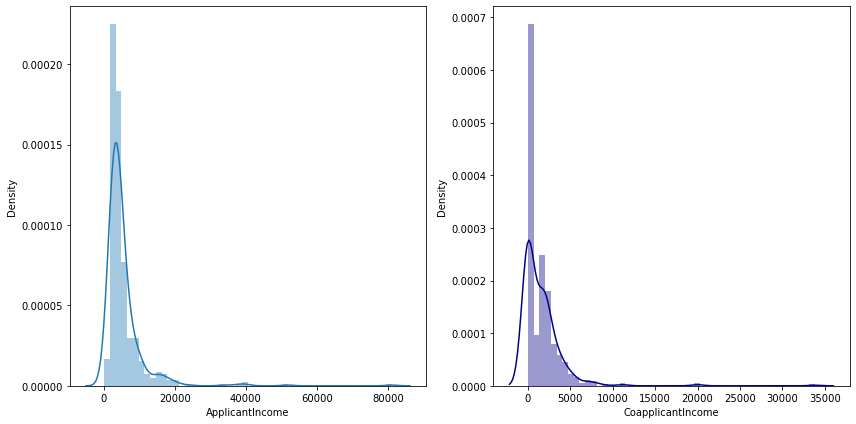

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(x_train.ApplicantIncome)
plt.subplot(1,2,2)
sns.distplot(x_train.CoapplicantIncome,color = 'darkblue')
plt.tight_layout()

It was look like the applicanticome mostly in between 0 to 20000 and in coapplicantincome 0 to 8000.

C:\Users\Parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

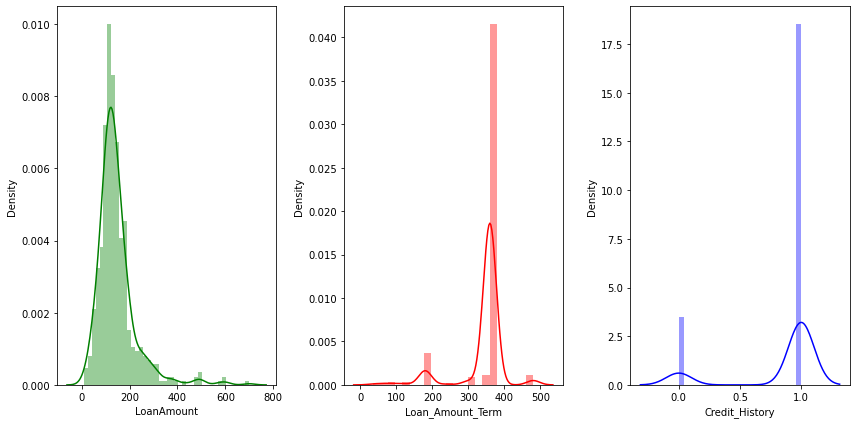

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.distplot(x_train.LoanAmount,color='green')
plt.subplot(1,3,2)
sns.distplot(x_train.Loan_Amount_Term,color='red')
plt.subplot(1,3,3)
sns.distplot(x_train.Credit_History,color='Blue')
plt.tight_layout()

Loan amount was nearly like normal distribution.

Loan amount term distributed in 200,310,370 and highly in 380.

Credit history between 0 and 1.

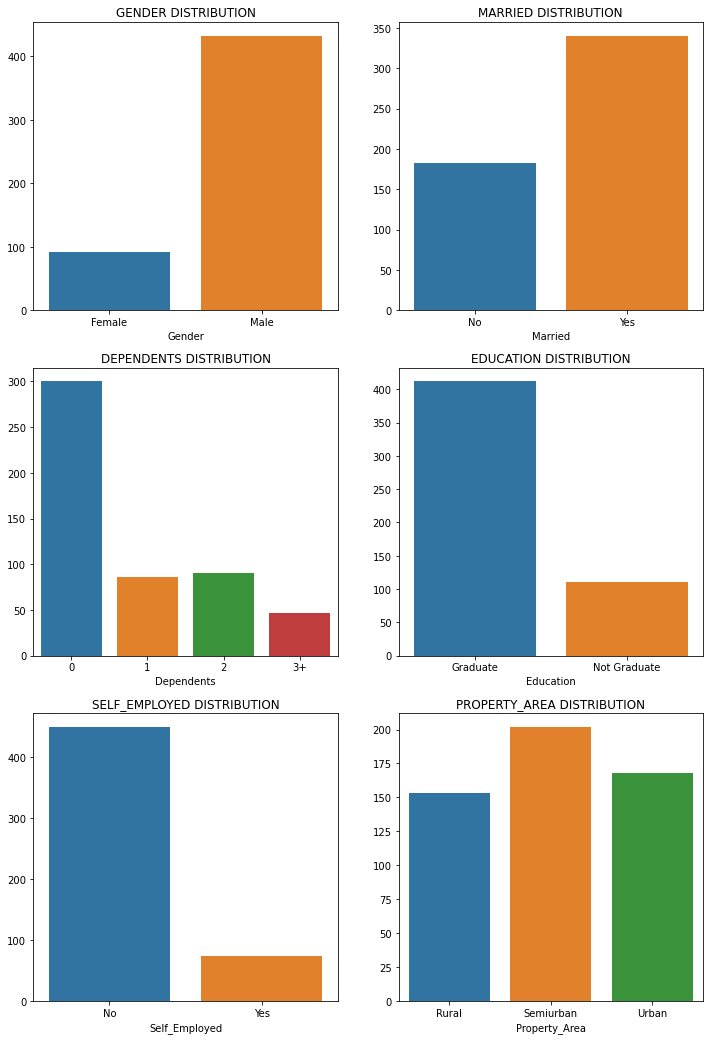

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,18))

A=x_train['Gender'].groupby(x_train['Gender']).count()
B=x_train['Married'].groupby(x_train['Married']).count()
C=x_train['Dependents'].groupby(x_train['Dependents']).count()
D=x_train['Education'].groupby(x_train['Education']).count()
E=x_train['Self_Employed'].groupby(x_train['Self_Employed']).count()
F=x_train['Property_Area'].groupby(x_train['Property_Area']).count()

plt.subplot(3,2,1)
sns.barplot(x=A.index,y=A.values,data=x_train)
plt.title('GENDER DISTRIBUTION')

plt.subplot(3,2,2)
sns.barplot(x=B.index,y=B.values,data=x_train)
plt.title('MARRIED DISTRIBUTION')

plt.subplot(3,2,3)
sns.barplot(x=C.index,y=C.values,data=x_train)
plt.title('DEPENDENTS DISTRIBUTION')

plt.subplot(3,2,4)
sns.barplot(x=D.index,y=D.values,data=x_train)
plt.title('EDUCATION DISTRIBUTION')

plt.subplot(3,2,5)
sns.barplot(x=E.index,y=E.values,data=x_train)
plt.title('SELF_EMPLOYED DISTRIBUTION')

plt.subplot(3,2,6)
sns.barplot(x=F.index,y=F.values,data=x_train)
plt.title('PROPERTY_AREA DISTRIBUTION')

plt.show()
plt.tight_layout()

In gender the male dominates more distribution and in married yes dominates more distribution
In dependents 0 distributed more and in education graduated distributed more.
In self_employmed are less which means no distributed more and in property area semiurban distributed more.

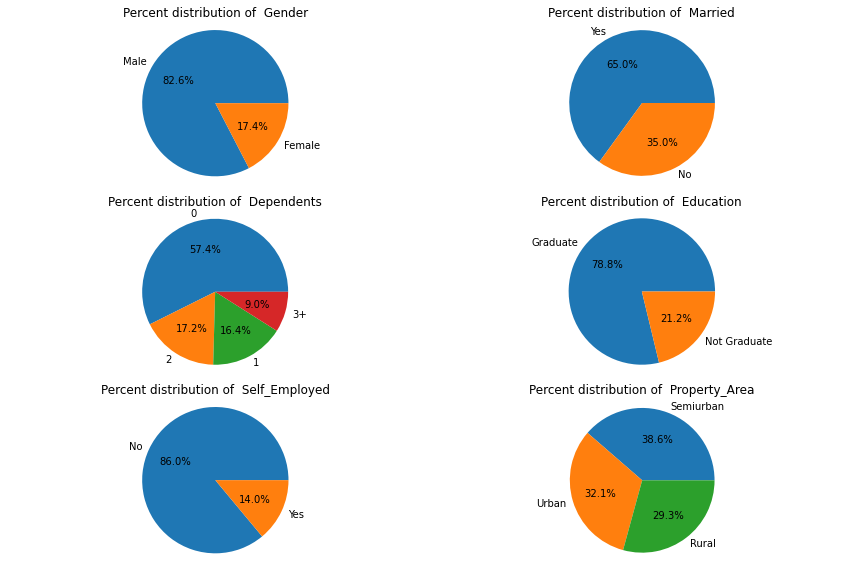

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(321)
df_source = x_train.Gender.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['Gender'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  Gender')
plt.axis('equal')

plt.subplot(322)
df_source = x_train.Married.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['Married'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  Married')
plt.axis('equal')

plt.subplot(323)
df_source = x_train.Dependents.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['Dependents'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  Dependents')
plt.axis('equal')
    
plt.subplot(324)
df_source = x_train.Education.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['Education'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  Education')
plt.axis('equal')
    
plt.subplot(325)
df_source = x_train.Self_Employed.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['Self_Employed'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  Self_Employed')
plt.axis('equal')

plt.subplot(326)
df_source = x_train.Property_Area.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['Property_Area'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  Property_Area')
plt.axis('equal')
    
plt.tight_layout()
plt.show()

# FEATURE VS TARGET

In [ ]:
# Loan_Status is a target variable

In [114]:
x_train['Loan_Status']=x_train['Loan_Status'].map({'Y':1,'N':0})

In [115]:
x_train['Loan_Status'].unique()

array([1, 0])

In [ ]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

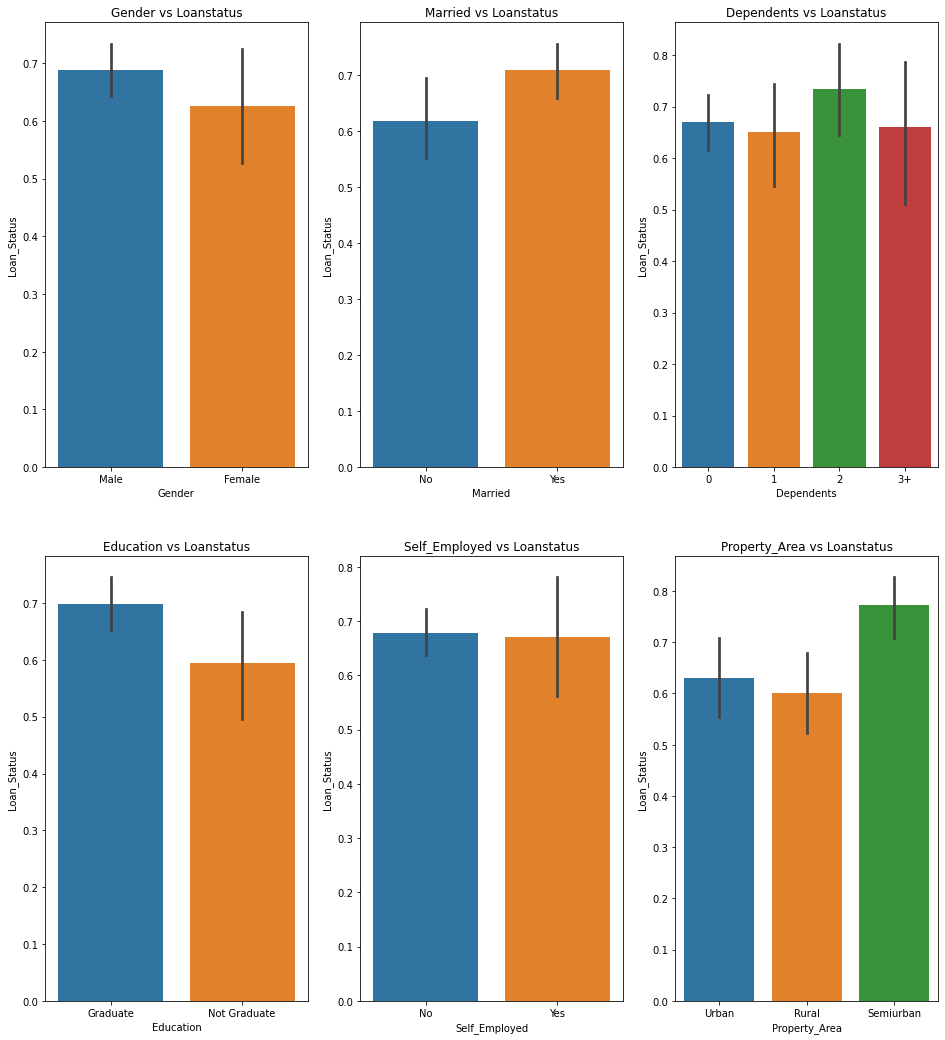

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,18))

plt.subplot(231)
sns.barplot(x='Gender',y='Loan_Status',data=x_train)
plt.title('Gender vs Loanstatus')

plt.subplot(232)
sns.barplot(x='Married',y='Loan_Status',data=x_train)
plt.title('Married vs Loanstatus')

plt.subplot(233)
sns.barplot(x='Dependents',y='Loan_Status',data=x_train)
plt.title('Dependents vs Loanstatus')

plt.subplot(234)
sns.barplot(x='Education',y='Loan_Status',data=x_train)
plt.title('Education vs Loanstatus')

plt.subplot(235)
sns.barplot(x='Self_Employed',y='Loan_Status',data=x_train)
plt.title('Self_Employed vs Loanstatus')

plt.subplot(236)
sns.barplot(x='Property_Area',y='Loan_Status',data=x_train)
plt.title('Property_Area vs Loanstatus')

plt.show()
plt.tight_layout()

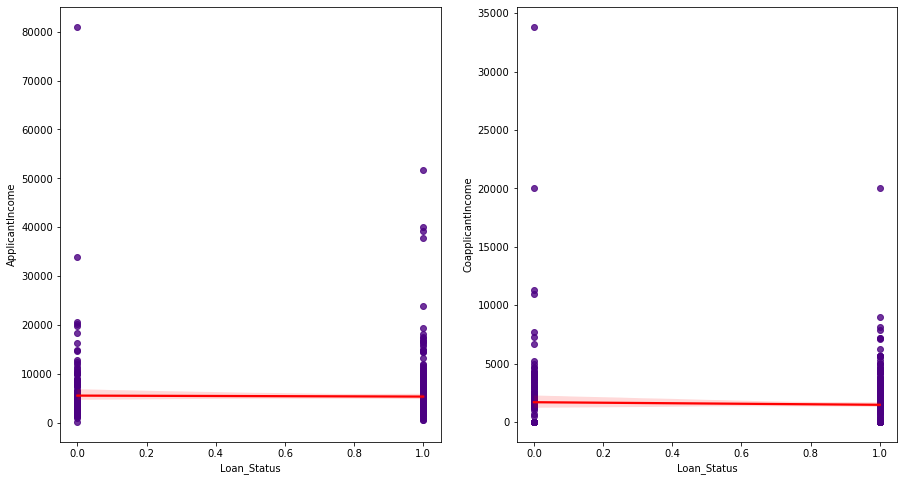


                  ApplicantIncome  Loan_Status
ApplicantIncome         1.000000    -0.015526
Loan_Status            -0.015526     1.000000

                    CoapplicantIncome  Loan_Status
CoapplicantIncome           1.000000    -0.040646
Loan_Status                -0.040646     1.000000


<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(121)
sns.regplot(x=x_train['Loan_Status'],y=x_train['ApplicantIncome'],scatter_kws={'color':'indigo'},line_kws={'color':'red'})

plt.subplot(122)
sns.regplot(x=x_train['Loan_Status'],y=x_train['CoapplicantIncome'],scatter_kws={'color':'indigo'},line_kws={'color':'red'})

plt.show()
plt.tight_layout()
print('\n',x_train[['ApplicantIncome','Loan_Status']].corr())
print('\n',x_train[['CoapplicantIncome','Loan_Status']].corr())

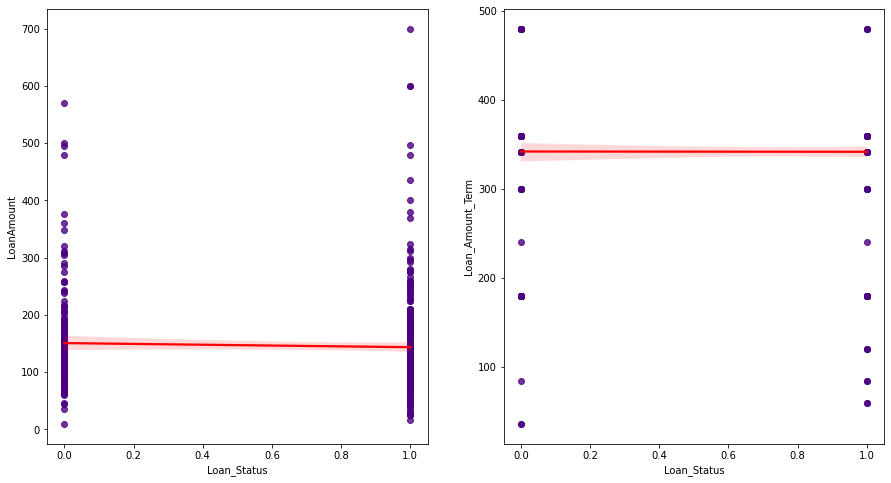


              LoanAmount  Loan_Status
LoanAmount     1.000000    -0.040986
Loan_Status   -0.040986     1.000000

                   Loan_Amount_Term  Loan_Status
Loan_Amount_Term          1.000000    -0.002297
Loan_Status              -0.002297     1.000000


<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(15,8))

plt.subplot(121)
sns.regplot(x=x_train['Loan_Status'],y=x_train['LoanAmount'],scatter_kws={'color':'indigo'},line_kws={'color':'red'})

plt.subplot(122)
sns.regplot(x=x_train['Loan_Status'],y=x_train['Loan_Amount_Term'],scatter_kws={'color':'indigo'},line_kws={'color':'red'})

plt.show()
plt.tight_layout()
print('\n',x_train[['LoanAmount','Loan_Status']].corr())
print('\n',x_train[['Loan_Amount_Term','Loan_Status']].corr())


                 Credit_History  Loan_Status
Credit_History        1.000000     0.550272
Loan_Status           0.550272     1.000000


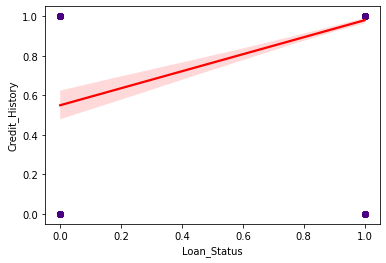

In [29]:
sns.regplot(x=x_train['Loan_Status'],y=x_train['Credit_History'],scatter_kws={'color':'indigo'},line_kws={'color':'red'})
print('\n',x_train[['Credit_History','Loan_Status']].corr())

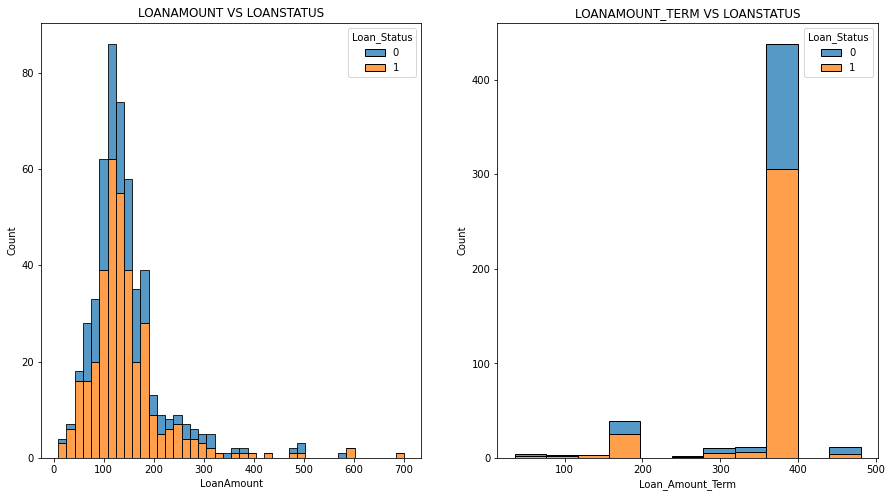

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(15,8))

plt.subplot(121)
sns.histplot(data=x_train, x="LoanAmount", hue="Loan_Status", multiple="stack")
plt.title('LOANAMOUNT VS LOANSTATUS')

plt.subplot(122)
sns.histplot(data=x_train, x="Loan_Amount_Term", hue="Loan_Status", multiple="stack")
plt.title('LOANAMOUNT_TERM VS LOANSTATUS')
plt.show()
plt.tight_layout()


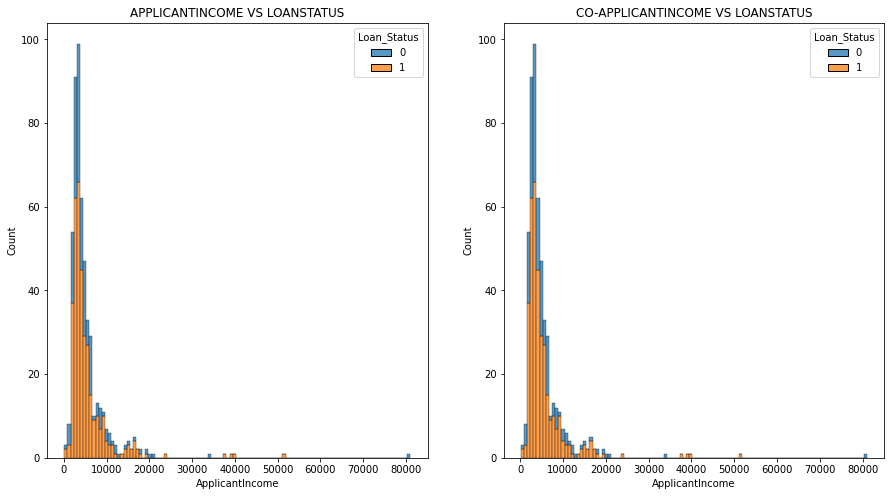

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(15,8))

plt.subplot(121)
sns.histplot(data=x_train, x="ApplicantIncome", hue="Loan_Status", multiple="stack")
plt.title('APPLICANTINCOME VS LOANSTATUS')

plt.subplot(122)
sns.histplot(data=x_train, x="ApplicantIncome", hue="Loan_Status", multiple="stack")
plt.title('CO-APPLICANTINCOME VS LOANSTATUS')
plt.show()
plt.tight_layout()


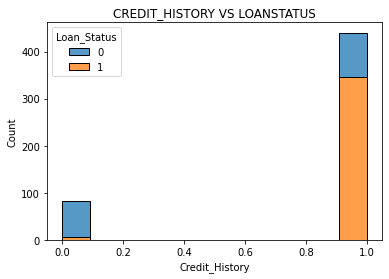

<Figure size 432x288 with 0 Axes>

In [31]:
sns.histplot(data=x_train, x="Credit_History", hue="Loan_Status", multiple="stack")
plt.title('CREDIT_HISTORY VS LOANSTATUS')
plt.show()
plt.tight_layout()

### COMPARING TARGET VARIABLE(Loan status) & LOAN AMOUNT WITH VARIOUS FEATURES 

<Figure size 720x720 with 0 Axes>

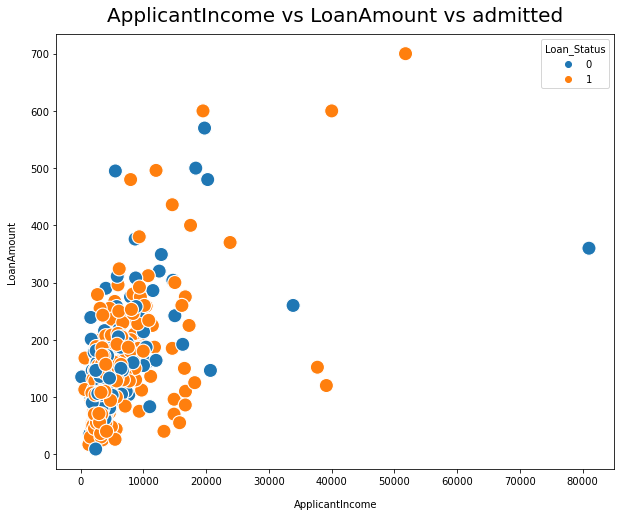

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=x_train, s=200)
plt.title("ApplicantIncome vs LoanAmount vs admitted", y=1.015, fontsize=20)
plt.xlabel("ApplicantIncome", labelpad=13)
plt.ylabel("LoanAmount", labelpad=13)
ax = plt.gca()

There is an relation b/w applicant income and loan amount.

The loan amount depends on the applicant income.

In some places applicant income is low but loan amount is high in that case they are not admitted.

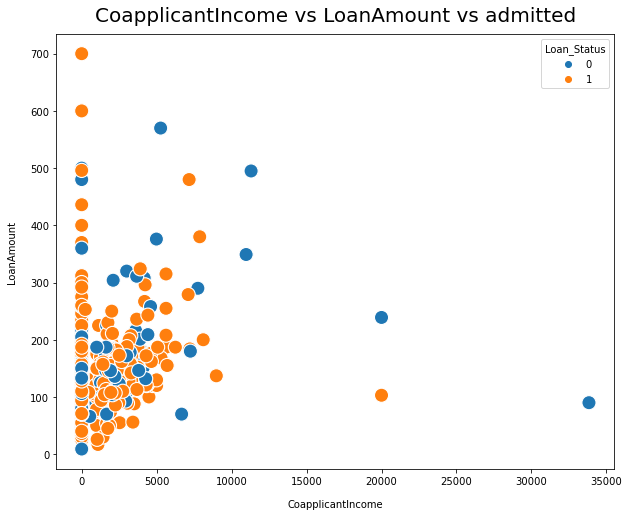

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status', data=x_train, s=200)
plt.title("CoapplicantIncome vs LoanAmount vs admitted", y=1.015, fontsize=20)
plt.xlabel("CoapplicantIncome", labelpad=13)
plt.ylabel("LoanAmount", labelpad=13)
ax = plt.gca()

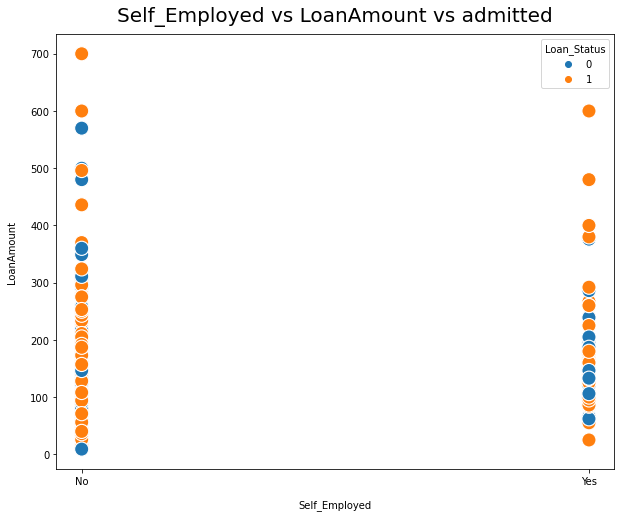

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Self_Employed', y='LoanAmount', hue='Loan_Status', data=x_train, s=200)
plt.title("Self_Employed vs LoanAmount vs admitted", y=1.015, fontsize=20)
plt.xlabel("Self_Employed", labelpad=13)
plt.ylabel("LoanAmount", labelpad=13)
ax = plt.gca()

Self employed peoples admitted for loan is low in range.

The non-selfemployed one can recieve more loan amount than self employed one.

# ENCODE THE DATA

In [37]:
x_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area         object
Loan_Status            int64
dtype: object

In [ ]:
x_test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [116]:
x_train['Gender']=x_train['Gender'].map({'Male':0,'Female':1})
x_train['Married']=x_train['Married'].map({'No':0,'Yes':1})
x_train['Dependents']=x_train['Dependents'].map({'0':2,'2':3,'1':0,"3+":1})
x_train['Education']=x_train['Education'].map({'Not Graduate':0,'Graduate':1})
x_train['Self_Employed']=x_train['Self_Employed'].map({'No':0,'Yes':1})
x_train['Property_Area']=x_train['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2})
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,2,1,0,5849,0.0,146.412162,360.0,1,1,1
1,0,1,0,1,0,4583,1508.0,128.000000,360.0,1,0,0
2,0,1,2,1,1,3000,0.0,66.000000,360.0,1,1,1
3,0,1,2,0,0,2583,2358.0,120.000000,360.0,1,1,1
4,0,0,2,1,0,6000,0.0,141.000000,360.0,1,1,1


In [117]:
x_test['Gender']=x_test['Gender'].map({'Male':0,'Female':1})
x_test['Married']=x_test['Married'].map({'No':0,'Yes':1})
x_test['Dependents']=x_test['Dependents'].map({'0':2,'2':3,'1':0,"3+":1})
x_test['Education']=x_test['Education'].map({'Not Graduate':0,'Graduate':1})
x_test['Self_Employed']=x_test['Self_Employed'].map({'No':0,'Yes':1})
x_test['Property_Area']=x_test['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2})
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,2,1,0,5720,0,110.0,360.0,1,1
1,0,1,0,1,0,3076,1500,126.0,360.0,1,1
2,0,1,3,1,0,5000,1800,208.0,360.0,1,1
4,0,0,2,0,0,3276,0,78.0,360.0,1,1
5,0,1,2,0,1,2165,3422,152.0,360.0,1,1


In [119]:
x_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# SPLIT THE DATA

In [ ]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [120]:
X = x_train[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values
y = x_train['Loan_Status'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [35]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,

# MODEL

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train) 
y_pred=logistic_regression.predict(X_test)

y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [ ]:
a=logistic_regression.coef_
a

array([[-3.21698383e-01,  5.85009282e-01, -2.83756621e-01,
         3.43645997e-01,  1.61227716e-01,  1.47310365e-05,
        -4.64371438e-05, -3.09890183e-03, -4.87893366e-03,
         2.70810638e+00,  2.67863417e-01]])

In [ ]:
data={'Coefficient':[-3.21698383e-01,  5.85009282e-01, -2.83756621e-01,
         3.43645997e-01,  1.61227716e-01,  1.47310365e-05,
        -4.64371438e-05, -3.09890183e-03, -4.87893366e-03,
         2.70810638e+00,  2.67863417e-01]}
coeff_df = pd.DataFrame(data=data,index=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome', 'CoapplicantIncome', 
         'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area'])
coeff_df

,Coefficient
Gender,-0.321698
Married,0.585009
Dependents,-0.283757
Education,0.343646
Self_Employed,0.161228
ApplicantIncome,0.000015
CoapplicantIncome,-0.000046
LoanAmount,-0.003099
Loan_Amount_Term,-0.004879
Credit_History,2.708106


In [ ]:
logistic_regression.intercept_

array([0.00303979])

## TOP 5 IMPORTANT FEATURES
1. Credit history
2. Married
3. Education
4. Property area
5. Self employed

### Equation
**y= 1/ (1+ e^-mx-c)**


**Loan_status**
    =1/(1+e^(-(-0.321698383)*Gender - 0.585009282*Married - (-0.283756621)*Dependents   
    -0.343645997*(Education) - 0.161227716*Self_employed -0.147310365*Applicantincome
    -(-0.464371438)*coapplicantincome -(-0.309890183)*loanamount
    -(-4.87893366)*loanamountterm 
    -(2.70810638)*credit_history -0.267863417property_area - (0.00303979)))

In [ ]:
y_test=y_test
y_pred = logistic_regression.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
126,0,0
127,1,1
128,1,1
129,1,1


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

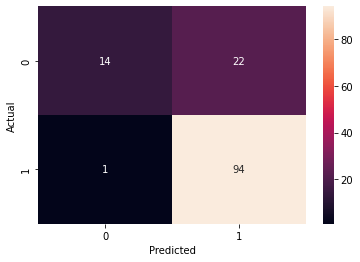

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# EVALUATION METRIC

In [ ]:
f1_score(y_test,y_pred)

0.8909952606635071

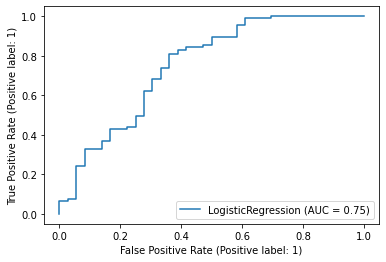

In [ ]:
plot_roc_curve(logistic_regression, X_test, y_test)

##  USING X_TEST

In [ ]:
y_pred = logistic_regression.predict(x_test)
df['loan_status'] = pd.DataFrame({'Predicted': y_pred})
df['loan_status']

0      1
1      1
2      1
3      1
4      1
      ..
302    1
303    1
304    1
305    1
306    1
Name: loan_status, Length: 307, dtype: int64

In [ ]:
df['loan_status'].unique()
len(df['loan_status'])-df['loan_status'].sum()

50

In [ ]:
df['loan_status']

## **DESICION TREE**

In [121]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier 
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_test, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.8035714285714286  Cross val score :  0.8247252747252748
Depth  :  2  Training Accuracy :  0.8112244897959183  Cross val score :  0.8093406593406595
Depth  :  3  Training Accuracy :  0.8112244897959183  Cross val score :  0.7252747252747251
Depth  :  4  Training Accuracy :  0.8214285714285714  Cross val score :  0.7258241758241758
Depth  :  5  Training Accuracy :  0.8443877551020408  Cross val score :  0.7186813186813186
Depth  :  6  Training Accuracy :  0.8596938775510204  Cross val score :  0.7043956043956043
Depth  :  7  Training Accuracy :  0.8903061224489796  Cross val score :  0.6956043956043956
Depth  :  8  Training Accuracy :  0.9132653061224489  Cross val score :  0.6730769230769231
Depth  :  9  Training Accuracy :  0.9413265306122449  Cross val score :  0.6807692307692308
Depth  :  10  Training Accuracy :  0.9642857142857143  Cross val score :  0.6659340659340659
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.6730769230769231
D

In [125]:
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier(max_depth=1) 
dt.fit(X_train,y_train) 
print( "AUROC score: ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

AUROC score:  0.6891812865497076


In [132]:
importance = dt.feature_importances_
list(zip(importance,['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']))

[(0.0, 'Gender'),
 (0.0, 'Married'),
 (0.0, 'Dependents'),
 (0.0, 'Education'),
 (0.0, 'Self_Employed'),
 (0.0, 'ApplicantIncome'),
 (0.0, 'CoapplicantIncome'),
 (0.0, 'LoanAmount'),
 (0.0, 'Loan_Amount_Term'),
 (1.0, 'Credit_History'),
 (0.0, 'Property_Area')]

## **XG-BOOST**

In [127]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.8170329670329671
Learning rate :  0.02  Cross-Val score :  0.8170329670329671
Learning rate :  0.03  Cross-Val score :  0.8021978021978023
Learning rate :  0.04  Cross-Val score :  0.8021978021978023
Learning rate :  0.05  Cross-Val score :  0.7950549450549451
Learning rate :  0.1  Cross-Val score :  0.7714285714285714
Learning rate :  0.11  Cross-Val score :  0.7791208791208791
Learning rate :  0.12  Cross-Val score :  0.7785714285714286
Learning rate :  0.13  Cross-Val score :  0.7785714285714286
Learning rate :  0.14  Cross-Val score :  0.7708791208791208
Learning rate :  0.15  Cross-Val score :  0.7785714285714286
Learning rate :  0.2  Cross-Val score :  0.7483516483516484
Learning rate :  0.5  Cross-Val score :  0.732967032967033
Learning rate :  0.7  Cross-Val score :  0.7252747252747254
Learning rate :  1  Cross-Val score :  0.7098901098901099


In [137]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
model = xgb.XGBClassifier(learning_rate = 0.01, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_train,y_train)
print( "AUROC score: ",roc_auc_score( y_test, model.predict_proba(X_test)[:, 1]))

AUROC score:  0.6282163742690059


In [133]:
importance = model.feature_importances_
list(zip(importance,['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']))

[(0.0, 'Gender'),
 (0.046604738, 'Married'),
 (0.041933097, 'Dependents'),
 (0.0, 'Education'),
 (0.045464393, 'Self_Employed'),
 (0.039233424, 'ApplicantIncome'),
 (0.005004513, 'CoapplicantIncome'),
 (0.03007323, 'LoanAmount'),
 (0.03196546, 'Loan_Amount_Term'),
 (0.75972116, 'Credit_History'),
 (0.0, 'Property_Area')]

## **RANDOM FOREST**

In [135]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print( "AUROC score: ",roc_auc_score( y_test, classifier.predict_proba(X_test)[:, 1]))

AUROC score:  0.7179824561403508


In [139]:
importance = classifier.feature_importances_
list(zip(importance,['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']))

[(0.02094402895799364, 'Gender'),
 (0.026935416030537025, 'Married'),
 (0.059560766502810183, 'Dependents'),
 (0.02217587289533525, 'Education'),
 (0.02241031143578146, 'Self_Employed'),
 (0.20182327311564968, 'ApplicantIncome'),
 (0.12481042625214882, 'CoapplicantIncome'),
 (0.2046406348821284, 'LoanAmount'),
 (0.0500994435274241, 'Loan_Amount_Term'),
 (0.21754263164623372, 'Credit_History'),
 (0.049057194753957825, 'Property_Area')]

# CONCLUSION

From all our models, we came to know credit history is the top most important feature.
  
    The Logistic regression AUROC score is 0.75
    The Desicion Tree AUROC score is 0.68
    The XG-BOOST model AUROC score is 0.62
    The Random forest AUROC score is 0.71


From above AUROC scores we came to know that Logistic Regression gives us good score compared to others.

The loan is mostly approved for the person who have good credit history,graduated,married,non-selfemployed one and the property area in semiurban.

From our observation the above mentioned people can easily get loan from the bank.

                          --------------- THE END ---------------